In [4]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [5]:
IMAGE_SIZE = [224, 224]

train_path = 'datasets/train'
test_path = 'datasets/test'

In [6]:
vgg = VGG16(input_shape = IMAGE_SIZE + [3], weights = 'imagenet', include_top = False)
for layer in vgg.layers:
    layer.trainable = False

58892288/58889256 [==============================] - 19s 0us/step


In [7]:
folders = glob('datasets/train/*')

In [9]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation = 'softmax')(x)
model = Model(inputs = vgg.input, outputs = prediction)

In [10]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [11]:
model.compile(loss="categorical_crossentropy",
             optimizer = "adam",
             metrics = ['accuracy'])

In [12]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

In [13]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [16]:
training_set = train_datagen.flow_from_directory('datasets/train',
                                                target_size = (224, 224),
                                                batch_size = 32,
                                                class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('datasets/test',
                                                target_size = (224, 224),
                                                batch_size = 32,
                                                class_mode = 'categorical')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [17]:
r = model.fit_generator(training_set,
                       validation_data=test_set,
                       epochs = 5,
                       steps_per_epoch = len(training_set),
                       validation_steps=len(test_set))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
163/163 [==============================] - 724s 4s/step - loss: 0.2034 - accuracy: 0.9202 - val_loss: 0.3347 - val_accuracy: 0.9038
Epoch 2/5
163/163 [==============================] - 754s 5s/step - loss: 0.1243 - accuracy: 0.9503 - val_loss: 0.2417 - val_accuracy: 0.9199
Epoch 3/5
163/163 [==============================] - 785s 5s/step - loss: 0.1051 - accuracy: 0.9578 - val_loss: 0.3784 - val_accuracy: 0.9054
Epoch 4/5
163/163 [==============================] - 839s 5s/step - loss: 0.0764 - accuracy: 0.9730 - val_loss: 0.3411 - val_accuracy: 0.9119
Epoch 5/5
163/163 [==============================] - 905s 6s/step - loss: 0.0743 - accuracy: 0.9735 - val_loss: 0.2463 - val_accuracy: 0.9103


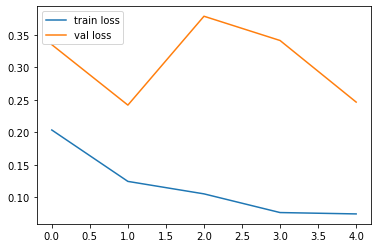

<Figure size 432x288 with 0 Axes>

In [18]:
plt.plot(r.history['loss'], label = 'train loss')
plt.plot(r.history['val_loss'], label = 'val loss')
plt.legend()
plt.show()
plt.savefig('LossVall_loss')

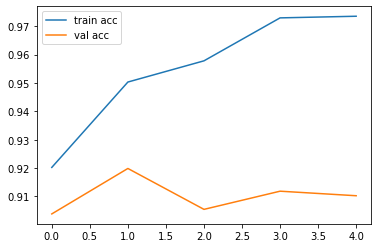

<Figure size 432x288 with 0 Axes>

In [19]:
plt.plot(r.history['accuracy'], label = 'train acc')
plt.plot(r.history['val_accuracy'], label = 'val acc')
plt.legend()
plt.show()
plt.savefig('AccVall_acc')

In [22]:
from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

# test the results

In [29]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
model = load_model('model_vgg19.h5')
img = image.load_img('datasets/val/NORMAL/NORMAL2-IM-1437-0001.jpeg', target_size = (224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)

In [30]:
classes

array([[1.0000000e+00, 4.4074206e-34]], dtype=float32)